<a href="https://colab.research.google.com/github/hepuliu/deep_learning/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN for Stock Prediction

# Data Processing

In [19]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
# import training set
from google.colab import drive
drive.mount
dataset_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/Course_DL/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [21]:
# feature scaling - normalization between 0 to 1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [22]:
# create a data structure with 60 past timesteps and 1 output
x_train = []
y_train = []
for i in range(60, 1258):
  x_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [23]:
# reshaping - adding indicator
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


# Building the RNN

In [24]:
# importing keras libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first LSTM layer and some dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# adding the second LSTM layer and some dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# adding the third LSTM layer and some dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# adding the fourth LSTM layer and some dropout regularization
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# adding the output layer of the LSTM
regressor.add(Dense(units = 1))

# compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# fitting the RNN to the training set
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)



Epoch 1/100
38/38 [==============================] - 11s 112ms/step - loss: 0.0490
Epoch 2/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0055
Epoch 6/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0045
Epoch 7/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0044
Epoch 8/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0039
Epoch 11/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 8s 201ms/step - loss: 0.0044
Epoch 13/100

# Making Prediction and Visualization

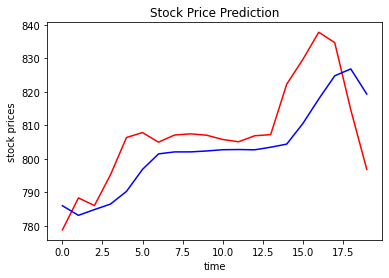

In [28]:
# get the real stock price
dataset_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/Course_DL/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# get the predicted stock price
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
x_test = []
for i in range (60, 80):
  x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# visualize the results
plt.plot(real_stock_price, color = 'red', label = ' Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = ' Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('time')
plt.ylabel('stock prices')
plt.show()